In [1]:
import numpy as np
import pandas as pd

# for basic analysis
import scipy

# data Visualization tools
import matplotlib as mlt
from matplotlib import pyplot as plt
import seaborn as sns
import plotly as ply

sns.set(style="darkgrid")

In [2]:
df = pd.read_csv('melb_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [3]:
df.sample(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
12040,Highett,46 Wilson St,2,h,1150000.0,PI,hockingstuart,29/07/2017,16.0,3190.0,...,1.0,2.0,591.0,100.0,1950.0,Bayside,-37.94763,145.02717,Southern Metropolitan,4794.0
4224,Newport,7 Effingham Rd,3,h,1305000.0,S,Greg,10/12/2016,8.4,3015.0,...,1.0,0.0,357.0,112.0,1900.0,Hobsons Bay,-37.84590,144.88770,Western Metropolitan,5498.0
8570,Altona,12 Kookaburra St,3,h,1165000.0,S,Greg,29/04/2017,13.8,3018.0,...,1.0,2.0,700.0,NaN,NaN,Hobsons Bay,-37.87070,144.80760,Western Metropolitan,5301.0
9633,Mitcham,8/12 Irvine St,3,t,800000.0,VB,Noel,17/06/2017,17.2,3132.0,...,2.0,2.0,343.0,130.0,2010.0,Whitehorse,-37.82158,145.21129,Eastern Metropolitan,6871.0
7191,Ormond,58 Draper St,4,h,1845000.0,S,Buxton,15/10/2016,11.8,3204.0,...,3.0,1.0,718.0,189.0,1939.0,Glen Eira,-37.90610,145.05090,Southern Metropolitan,3578.0
7152,Murrumbeena,2/15 Melbourne St,2,u,603000.0,S,Anderson,26/07/2016,12.1,3163.0,...,1.0,1.0,102.0,92.0,1960.0,Glen Eira,-37.88940,145.06790,Southern Metropolitan,4442.0
4717,Port Melbourne,175 Farrell St,2,h,1234500.0,S,hockingstuart,4/06/2016,3.8,3207.0,...,1.0,0.0,183.0,185.0,NaN,Port Phillip,-37.83290,144.93750,Southern Metropolitan,8648.0
125,Alphington,3/19 Harker St,2,u,525500.0,S,Miles,12/11/2016,6.4,3078.0,...,1.0,1.0,88.0,60.0,1960.0,Darebin,-37.77910,145.03060,Northern Metropolitan,2211.0
4874,Prahran,62 Pridham St,3,h,1612000.0,S,Jellis,30/07/2016,4.5,3181.0,...,2.0,0.0,146.0,139.0,1900.0,Stonnington,-37.85190,145.00550,Southern Metropolitan,7717.0
4954,Preston,37 Kendall St,3,h,930000.0,S,Nelson,17/09/2016,8.8,3072.0,...,1.0,2.0,468.0,NaN,NaN,Darebin,-37.74680,144.98460,Northern Metropolitan,14577.0


In [4]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

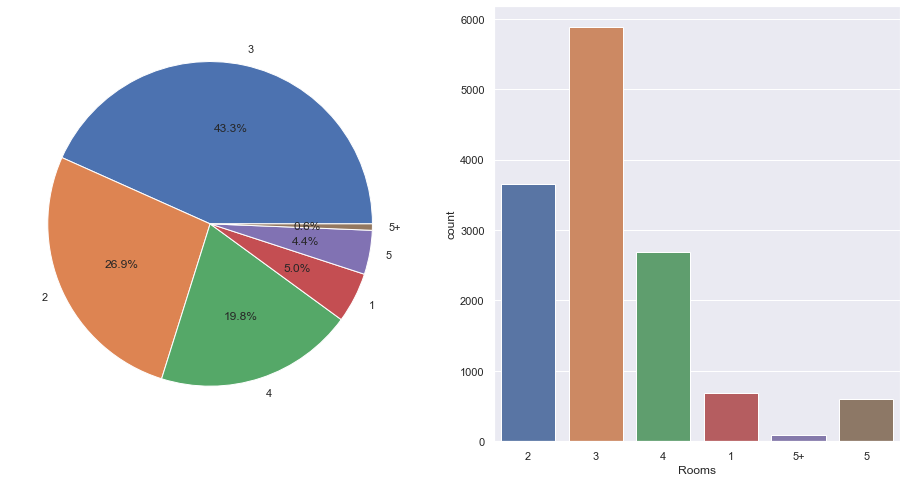

In [5]:
# Let us categorize with respect to number of rooms
fig_num_rooms, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))

by_room_number = df['Rooms'].copy()

## All the houses with rooms more than 5 will me categorized into 5+
by_room_number[by_room_number>5] = '5+'
rooms_count = by_room_number.value_counts()

## Data prep for countplot
data_count = df['Rooms'].copy()
data_count[data_count>5] = '5+'

df_count = pd.DataFrame(data_count.value_counts())
df_count.index.names=['count']
ax1.pie(x=df_count['Rooms'].values,labels=df_count.index.values,autopct='%1.1f%%',)
sns.countplot(x=data_count,ax=ax2)
plt.show()

<ipython-input-6-016fa4d0e8f1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_room_change['Rooms'][df_room_change['Rooms'] > 5] = "5+"


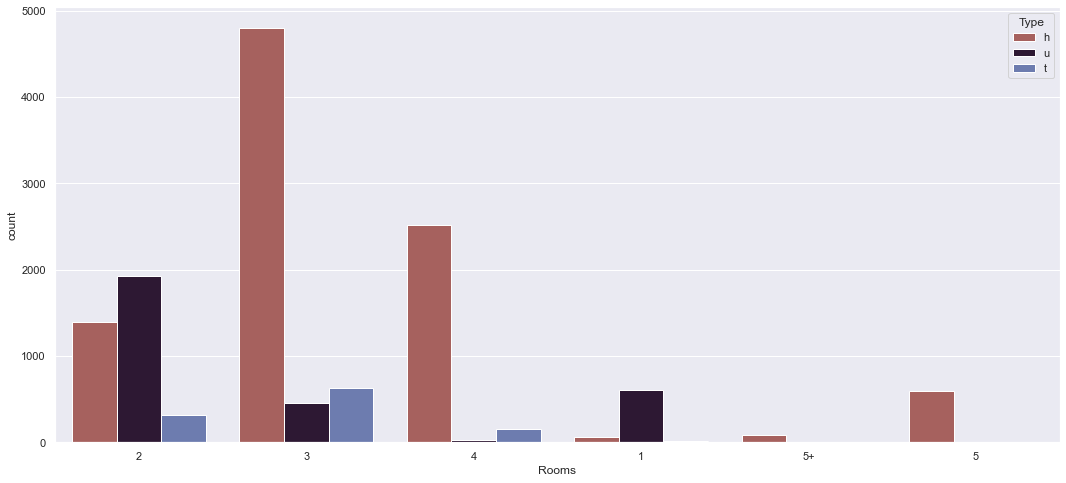

In [6]:
## Let us categorize the number of rooms with respect ot types
df_room_change = df.copy()
df_room_change['Rooms'][df_room_change['Rooms'] > 5] = "5+"
plt.figure(figsize=(18,8))
sns.countplot(data=df_room_change,x='Rooms',hue='Type',palette='twilight_r')
plt.show()

## Let us look at the Retail sellers in Melbourne 

In [7]:
df_room_change['SellerG'].nunique()

268

<h4>There are total '<b><i>268</i></b>' Sellers in this dataset</h4>
      <p>Let us select the top 10 Sellers in this dataset and the rest will be tagged as others</p>

In [8]:
top_10_sellers = df_room_change['SellerG'].value_counts().index.values[:10]
pd.DataFrame(df_room_change['SellerG'].value_counts()[:10])

,SellerG
Nelson,1565
Jellis,1316
hockingstuart,1167
Barry,1011
Ray,701
Marshall,659
Buxton,632
Biggin,393
Brad,342
Fletchers,301


In [9]:
## Top 10 sellers in Melbourne
def check_seller(name):
    if name not in top_10_sellers:
        return False
    else:
        return True
df_sellers_data = df_room_change.copy()

In [10]:
df_sellers_data['SellerG'][~df_sellers_data['SellerG'].apply(check_seller)] = "Other"

<ipython-input-10-d61de001c2f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sellers_data['SellerG'][~df_sellers_data['SellerG'].apply(check_seller)] = "Other"


In [11]:
 df_top_10_sellers = df_sellers_data[df_sellers_data['SellerG']!="Other"]

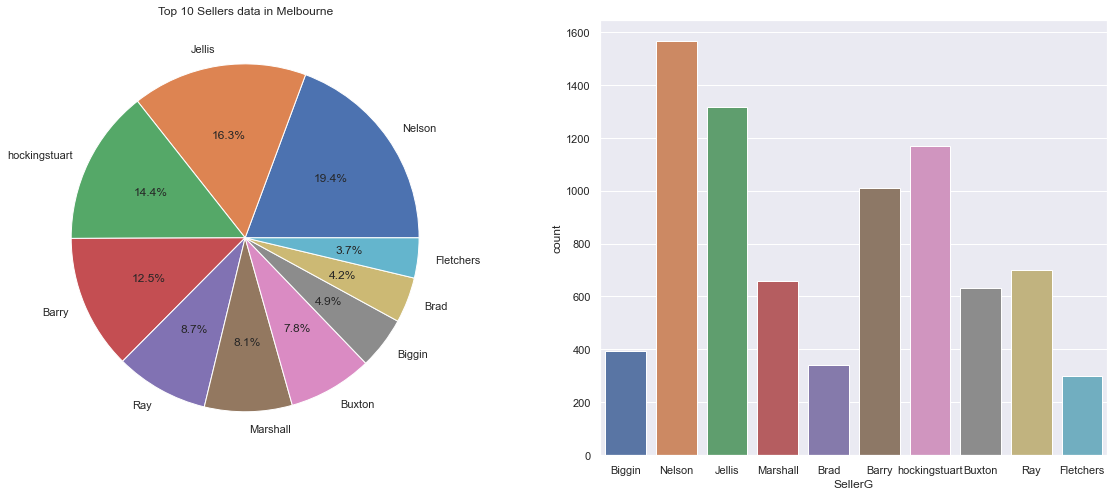

In [12]:
## Plot for the top 10 sellers in melbourne
fig_seller , (ax1,ax2) = plt.subplots(1,2,figsize=(20,8))
seller_labels = df_top_10_sellers['SellerG'].value_counts().index.values
ax1.pie(x=df_top_10_sellers['SellerG'].value_counts(),labels=seller_labels,autopct="%1.1f%%")
ax1.set_title("Top 10 Sellers data in Melbourne")
sns.countplot(data=df_top_10_sellers,x='SellerG',ax=ax2)
plt.show()

### We can also find out the Sellers with respect to the Regions they work in

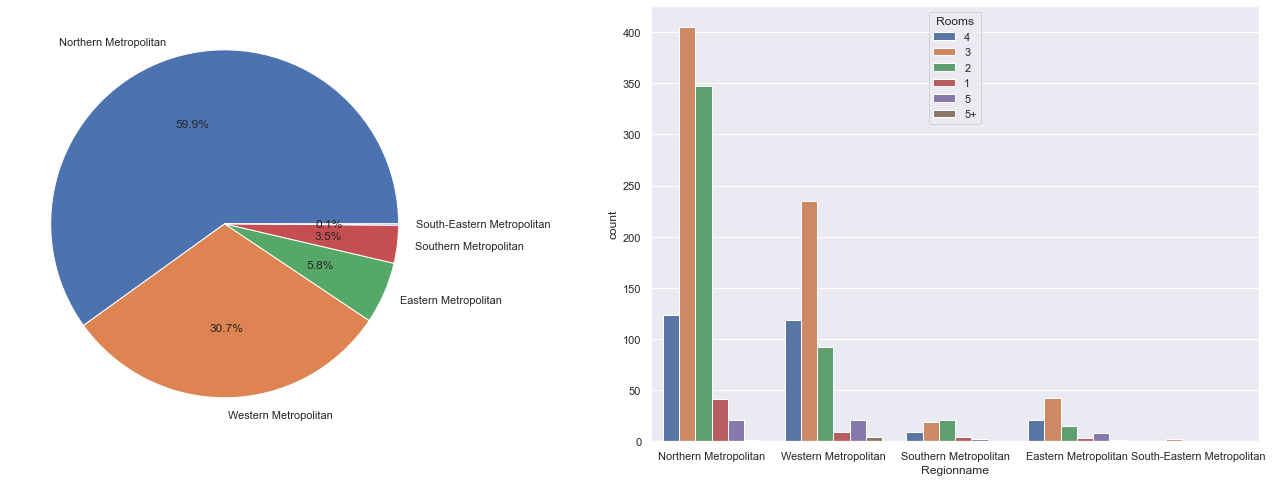

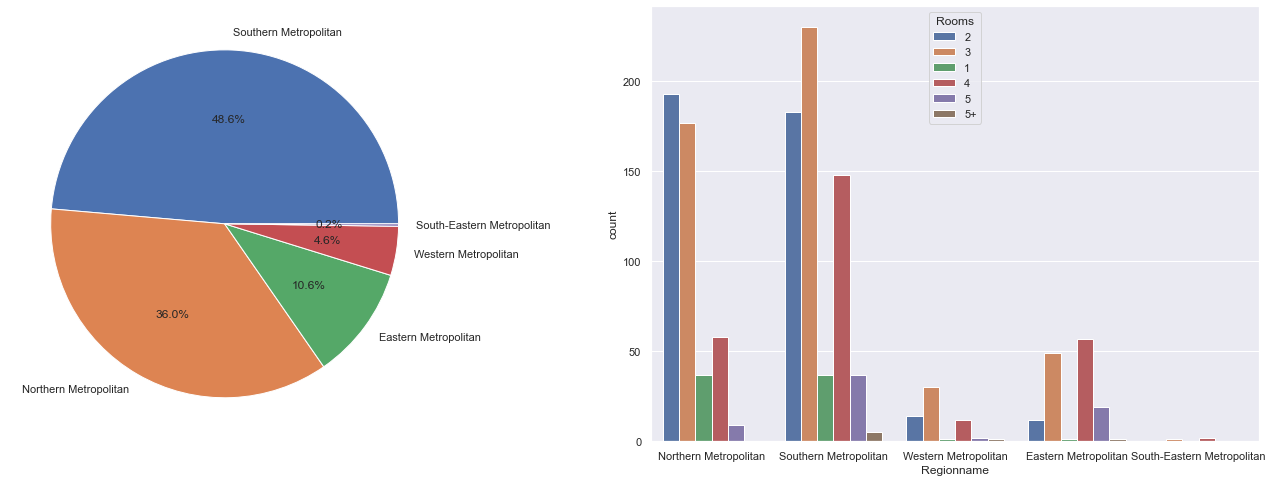

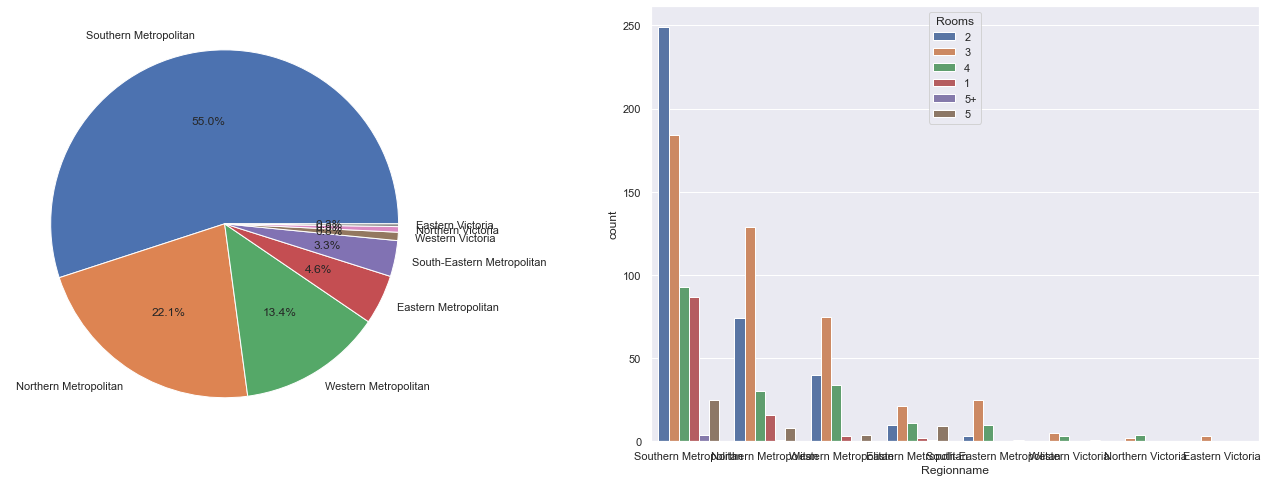

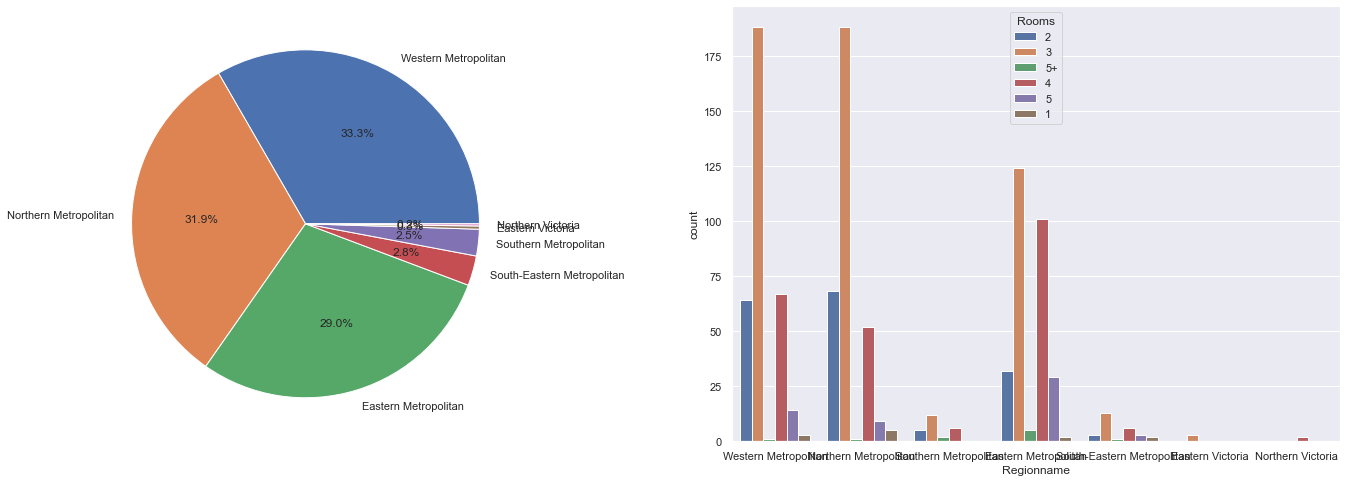

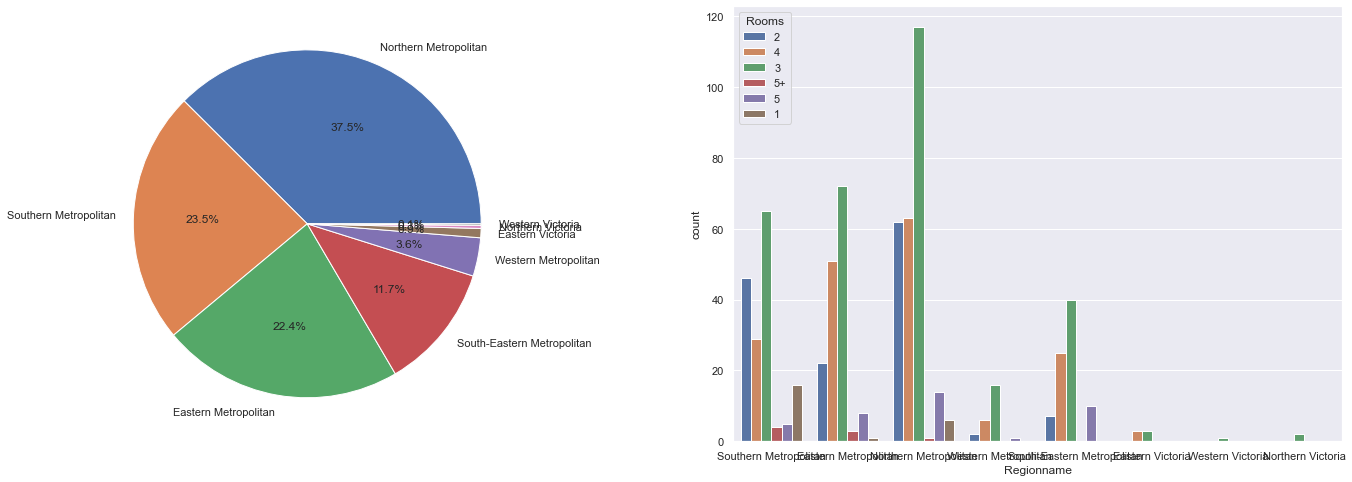

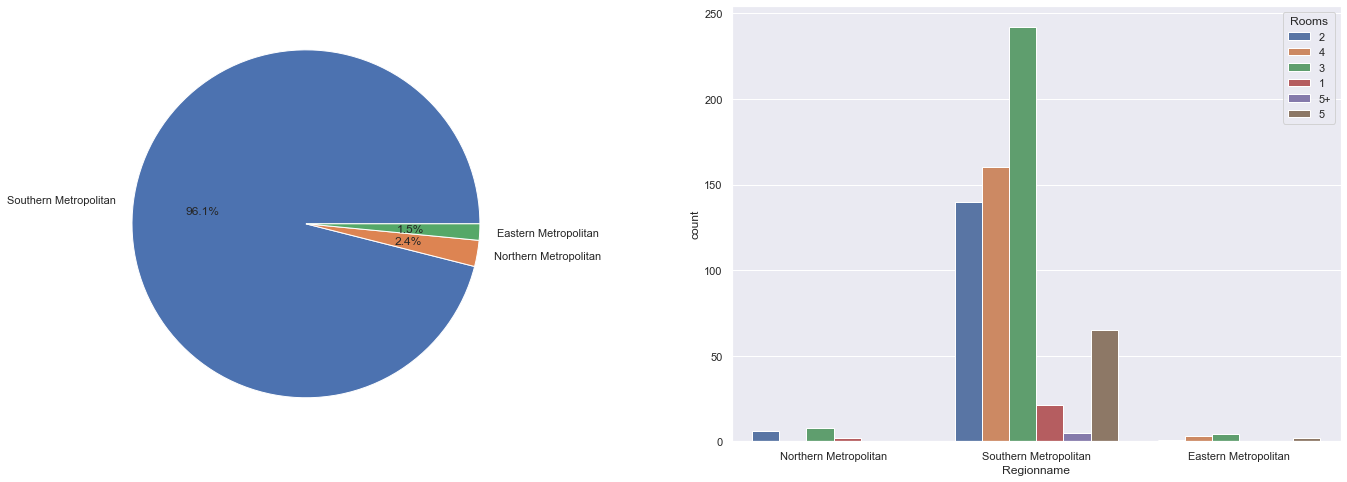

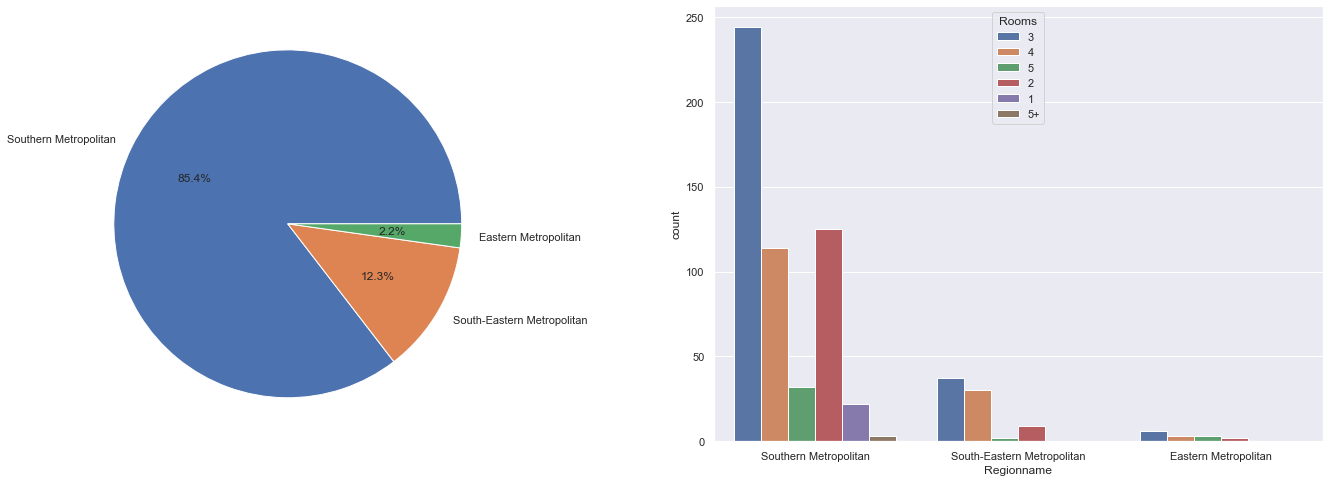

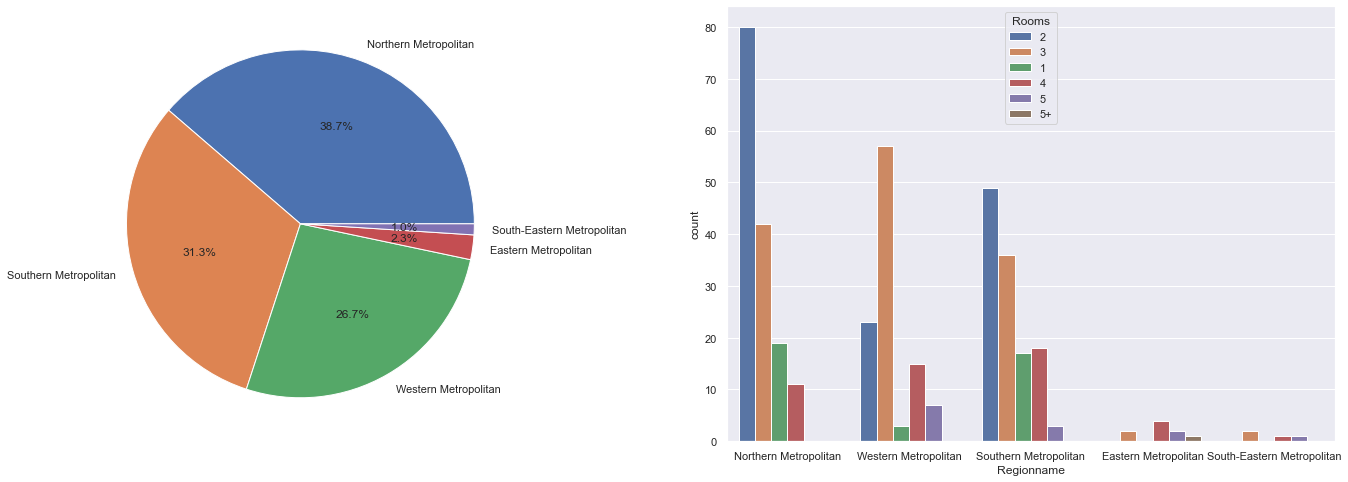

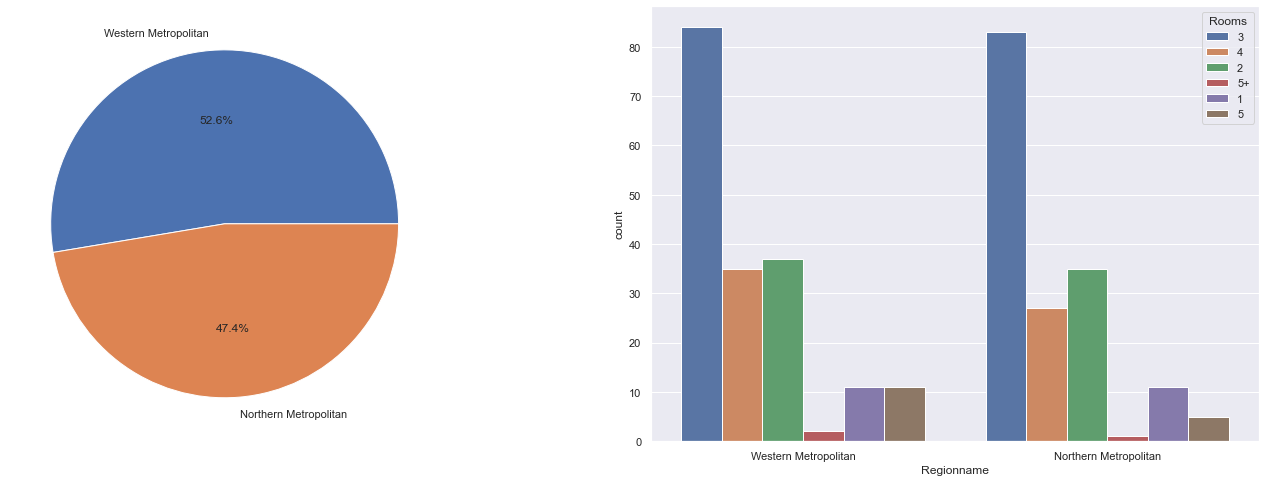

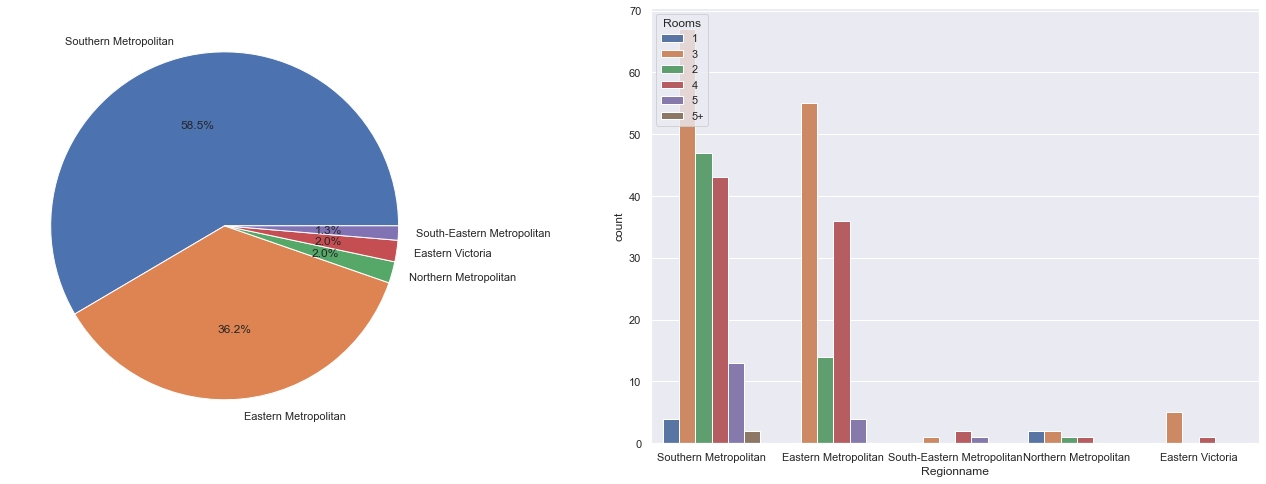

In [13]:
for seller in top_10_sellers:
    dummy_data = df_top_10_sellers[df_top_10_sellers['SellerG'] == seller]
    fig_seller, (ax1,ax2) = plt.subplots(1,2,figsize=(24,8))
    region_labels = dummy_data['Regionname'].value_counts().index.values
    ax1.pie(x=dummy_data['Regionname'].value_counts().values,labels=region_labels,autopct="%1.1f%%")
    sns.countplot(data=dummy_data,x="Regionname",hue='Rooms')
    plt.show()

In [ ]:
## Let us look at the price distribution 